In [2]:
import os
import pandas as pd 
import keras
import numpy as np

2024-05-09 14:55:53.853966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 14:55:53.854925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 14:55:53.983740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
read_data = pd.read_csv("/kaggle/input/autoirrigationdata/data.csv")

In [4]:
read_data

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
...,...,...,...,...
195,cotton,941,13,1
196,cotton,902,45,1
197,cotton,894,42,1
198,cotton,1022,45,1


In [5]:
girdi_data = read_data[["moisture","temp"]]

In [6]:
girdi_data

,moisture,temp
0,638,16
1,522,18
2,741,22
3,798,32
4,690,28
...,...,...
195,941,13
196,902,45
197,894,42
198,1022,45


In [7]:
cikti_data = read_data[["pump"]]

In [8]:
cikti_data

,pump
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


In [9]:
girdi_data = np.array(girdi_data)

In [10]:
girdi_data[2]

array([741,  22])

In [11]:
cikti_data = np.array(cikti_data)

In [12]:
cikti_data[2]

array([1])

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(girdi_data,cikti_data,test_size=0.2,random_state = 10)

In [14]:
print(len(y_train))
print(len(y_test))

160
40


In [15]:
from keras.layers import Dense
import tensorflow as tf
model = keras.models.Sequential()
model.add(Dense(6,input_dim = 2,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6 ,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(1 ,activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0015),metrics = ["accuracy"] )


model.fit(X_train,y_train,epochs = 100,batch_size = 16)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2473 - loss: 320.7106
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2535 - loss: 248.4502 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2613 - loss: 190.1343 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 158.0525 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 119.7437 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2006 - loss: 106.7614 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 77.3161 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2543 - loss: 59.5196 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 47.9615 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2693 - loss: 38.1714 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 33.0140 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Accuracy: 0.825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


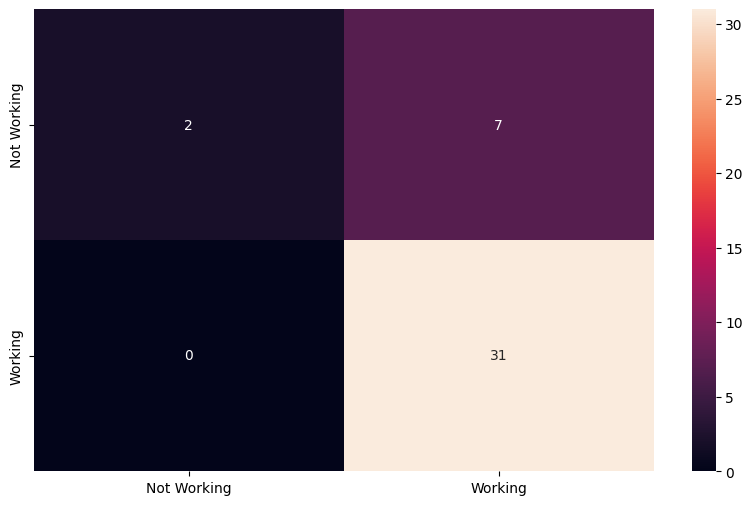

In [16]:
from sklearn import metrics

# Generate predictions
output_pred = model.predict(X_test)

# Convert predictions to binary values based on threshold of 0.5
output_pred = (output_pred > 0.5).flatten()

# Print accuracy
print("Accuracy:", metrics.accuracy_score(y_test, output_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create confusion matrix
cm = confusion_matrix(y_test, output_pred)
index = ['Not Working', 'Working']
columns = ['Not Working', 'Working']
cm_df = pd.DataFrame(cm, columns, index)

# Plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True, fmt="d")

import numpy as np

# Create a sample input (e.g., a data point with 5 features)
custom_input = np.array([[941, 16]])

# Make predictions on the model
custom_prediction = model.predict(custom_input)

# Convert predictions to binary values based on threshold of 0.5
custom_prediction = (custom_prediction > 0.5).flatten()

# Print the result


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3936 - loss: 0.7437 - val_accuracy: 0.7500 - val_loss: 0.6915
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6572 - loss: 0.6810 - val_accuracy: 0.8500 - val_loss: 0.6704
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6541 - loss: 0.6649 - val_accuracy: 0.8750 - val_loss: 0.6510
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6979 - loss: 0.6371 - val_accuracy: 0.8750 - val_loss: 0.6319
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6930 - loss: 0.6317 - val_accuracy: 0.8750 - val_loss: 0.6120
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7937 - loss: 0.6264 - val_accuracy: 0.8750 - val_loss: 0.5907
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8034 - loss: 0.6013 - val_accuracy: 0.8750 - val_loss: 0.5688
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8219 - loss: 0.5838 - val_accuracy: 0.8750 - val_loss:

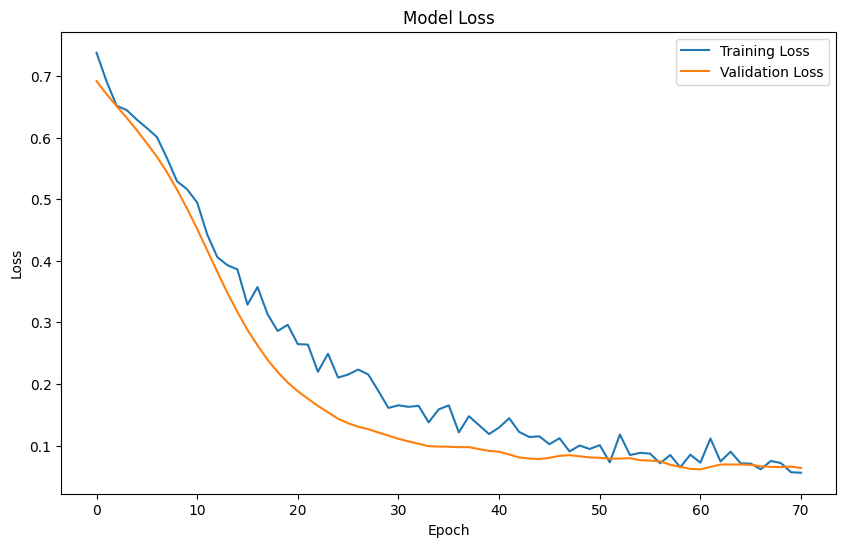

In [21]:
import os
import pandas as pd 
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
read_data = pd.read_csv("/kaggle/input/autoirrigationdata/data.csv")

# Preprocess data
girdi_data = read_data[["moisture","temp"]]
cikti_data = read_data[["pump"]]
girdi_data = (girdi_data - girdi_data.mean()) / girdi_data.std()  # Standardize features
cikti_data = cikti_data.values.ravel()  # Flatten output labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(girdi_data, cikti_data, test_size=0.2, random_state=10)

# Define model architecture
model = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=2, activation="relu"),
    keras.layers.Dropout(0.5),  # Add dropout layer to prevent overfitting
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define callbacks (for monitoring training progress)
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),  # Early stopping to prevent overfitting
    keras.callbacks.ModelCheckpoint("model_checkpoint.keras", save_best_only=True)  # Save the best model
]


# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=callbacks)

# Evaluate model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).flatten()

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_mat = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_mat)

# Plot loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6244 - loss: 0.6516 - val_accuracy: 0.8000 - val_loss: 0.6092
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7115 - loss: 0.6172 - val_accuracy: 0.8000 - val_loss: 0.5762
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7820 - loss: 0.5697 - val_accuracy: 0.8500 - val_loss: 0.5466
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8521 - loss: 0.5534 - val_accuracy: 0.8750 - val_loss: 0.5176
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8001 - loss: 0.5375 - val_accuracy: 0.8750 - val_loss: 0.4874
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8406 - loss: 0.4834 - val_accuracy: 0.8750 - val_loss: 0.4557
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8921 - loss: 0.4909 - val_accuracy: 0.9000 - val_loss: 0.4250
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8753 - loss: 0.4330 - val_accuracy: 0.9000 - val_loss: 0.

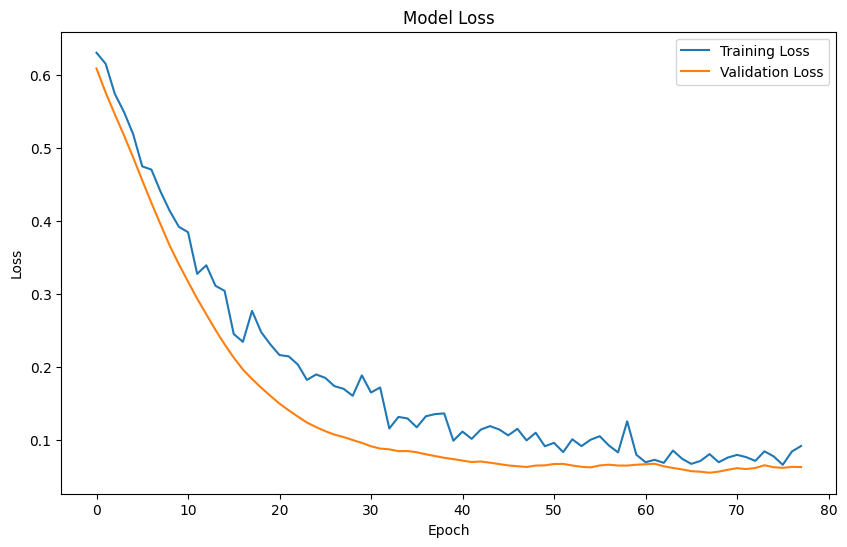

In [22]:
import os
import pandas as pd 
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
read_data = pd.read_csv("/kaggle/input/autoirrigationdata/data.csv")

# Preprocess data
girdi_data = read_data[["moisture","temp"]]
cikti_data = read_data[["pump"]]
girdi_data = (girdi_data - girdi_data.mean()) / girdi_data.std()  # Standardize features
cikti_data = cikti_data.values.ravel()  # Flatten output labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(girdi_data, cikti_data, test_size=0.2, random_state=10)

# Define model architecture
model = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=2, activation="relu"),
    keras.layers.Dropout(0.5),  # Add dropout layer to prevent overfitting
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define callbacks (for monitoring training progress)
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),  # Early stopping to prevent overfitting
    keras.callbacks.ModelCheckpoint("model_checkpoint.keras", save_best_only=True)  # Save the best model
]

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=callbacks)

# Evaluate model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).flatten()

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_mat = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_mat)

# Plot loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
